# Setting up

In [1]:
!pip install emoji

In [2]:
!pip install nltk

In [3]:
!pip install --upgrade nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.8 MB/s eta 0:00:0000:010:01
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.8.1 which is incompatible.


In [4]:
!pip install jieba

In [5]:
!pip install indoNLP

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 2.3 MB/s eta 0:00:00a 0:00:01


In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import jieba
import string
import emoji
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from nltk.tokenize import word_tokenize
from indoNLP.preprocessing import replace_slang
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from snowballstemmer import stemmer

# Dataset

## Train Dataset

In [7]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/Dataset/Training/MultiLanguageTrainDataset.csv
/kaggle/input/Dataset/Testing/Test2/MangolianTranslatedHateSpeech.csv
/kaggle/input/Dataset/Testing/Test2/IrishTranslatedHateSpeech.csv
/kaggle/input/Dataset/Testing/Test2/HindiTranslatedHateSpeech.csv
/kaggle/input/Dataset/Testing/Test2/PersianTranslatedHateSpeech.csv
/kaggle/input/Dataset/Testing/Test2/UrduTranslatedHateSpeech.csv
/kaggle/input/Dataset/Testing/Test2/GeorgianTranslatedHateSpeech.csv
/kaggle/input/Dataset/Testing/TestEmbedded2/MangolianLASERWordEmbeddings.csv
/kaggle/input/Dataset/Testing/TestEmbedded2/IrishLASERWordEmbeddings.csv
/kaggle/input/Dataset/Testing/TestEmbedded2/GeorgianLASERWordEmbeddings.csv
/kaggle/input/Dataset/Testing/TestEmbedded2/PersianLASERWordEmbeddings.csv
/kaggle/input/Dataset/Testing/TestEmbedded2/HindiLASERWordEmbeddings.csv
/kaggle/input/Dataset/Testing/TestEmbedded2/UrduLASERWordEmbeddings.csv
/kaggle/input/Dataset/Testing/TestEmbedded1/EnglishLASERWordEmbeddings.csv
/kaggle/input/

In [8]:
# load dataset
# train_path = "/content/Dataset/Training/MultiLanguageTrainDataset.csv"
train_path = "/kaggle/input/Dataset/Training/MultiLanguageTrainDataset.csv"
print('==> Loading the dataset...')
hate_S = pd.read_csv(train_path, na_values = ['unknown', ' '], index_col=0)
print('Load successfully!!\n')
hate_S

==> Loading the dataset...
Load successfully!!



,text,label,language
0,لك من جهة ان شاء بضل حرقة بقلبك وبلاطه ع صدرك ...,0.0,1
1,انجاز جديد للعهدجبران باسيل,0.0,1
2,قلبه كبير وئام وديموقراطي عكس باسيل هههه,0.0,1
3,ولك العما بقلبك عمي يا اوطى مخلوق عوج الارض رو...,1.0,1
4,يسعد صباحك يا قائد,0.0,1
...,...,...,...
219976,USER potong gaji dan fasilitas DPR aja yg 500a...,0.0,13
219977,"Kalian boleh tanya padaku ""kapan rabi?"", tapi ...",0.0,13
219978,Satu persatu akhirnya smua ditumbangkan oleh T...,0.0,13
219979,"USER + itu ga pernah solat, ga pernah ngaji, g...",0.0,13


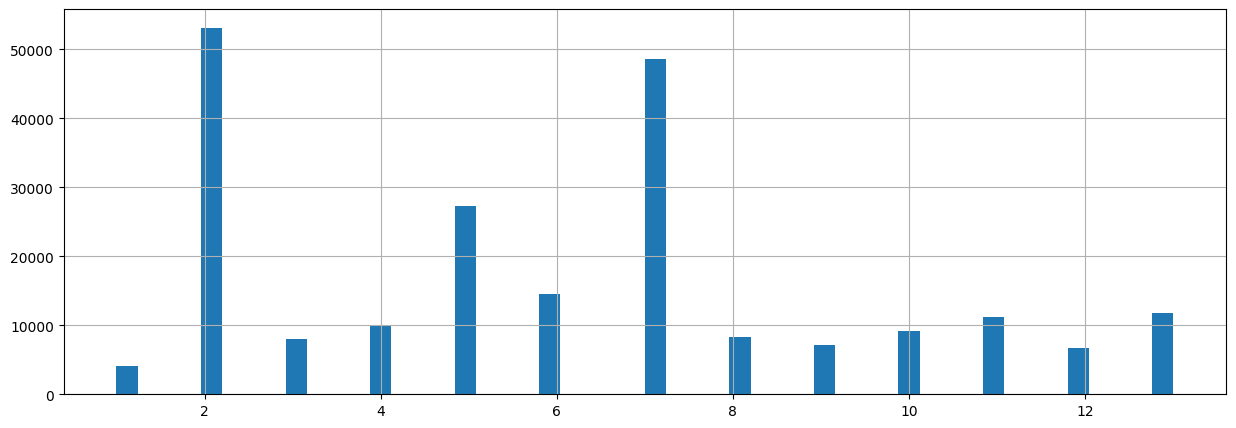

In [9]:
hate_S.language.hist(bins = 50, figsize = (15, 5))
plt.show()

Choose the languages for training

In [10]:
# 1: Arabic
# 4: French
# 5: German
# 6: Russian
# 7: Turkish
# 8: Roman Hindi/ Urdu
# 9: Korean
# 10: Italian
# 11: Spanish
# 12: Portuguese

lang_list = [1, 4, 5, 6, 7, 8, 9, 10, 11, 12]
hate_S.drop(hate_S[hate_S.language.isin(lang_list)].index, axis=0, inplace=True)
hate_S.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73064 entries, 4161 to 219980
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   text      73064 non-null  object 
 1   label     73064 non-null  float64
 2   language  73064 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ MB


## Validation Dataset

In [11]:
def split_validation(dataframe):
    en_df = dataframe[dataframe.language==2]
    zh_df = dataframe[dataframe.language==3]
    id_df = dataframe[dataframe.language==13]
    
    #Split 30% for every language
    en_train_df, en_val_df = train_test_split(en_df, test_size=0.3, random_state=42)
    zh_train_df, zh_val_df = train_test_split(zh_df, test_size=0.3, random_state=42)
    id_train_df, id_val_df = train_test_split(id_df, test_size=0.3, random_state=42)
    
    # Combine
    train_df = pd.concat([en_train_df, zh_train_df, id_train_df])
    val_df = pd.concat([en_val_df, zh_val_df, id_val_df])
    
    return train_df, val_df

In [12]:
trainset, val_set = split_validation(hate_S)

In [13]:
print(f"Total data points: {len(hate_S)}")
print(f"Training set size: {len(trainset)} ({len(trainset)/len(hate_S)*100:.2f}%)")
print(f"Validation set size: {len(val_set)} ({len(val_set)/len(hate_S)*100:.2f}%)")

Total data points: 73064
Training set size: 51144 (70.00%)
Validation set size: 21920 (30.00%)


## Test Dataset

In [14]:
# Test
# english_path = "/content/Dataset/Testing/Test1/English_test.csv"
english_path = "/kaggle/input/Dataset/Testing/Test1/English_test.csv"
english_test = pd.read_csv(english_path, na_values = ['unknown', ' '], index_col=0)
english_test['language'] = 2   # add one more language column to specify the language

# chinese_path = "/content/Dataset/Testing/Test1/Chinese_test.csv"
chinese_path = "/kaggle/input/Dataset/Testing/Test1/Chinese_test.csv"
chinese_test = pd.read_csv(chinese_path, na_values = ['unknown', ' '], index_col=0)
chinese_test['language'] = 3

# indonesian_path = "/content/Dataset/Testing/Test1/Indonesian_test.csv"
indonesian_path = "/kaggle/input/Dataset/Testing/Test1/Indonesian_test.csv"
indonesian_test = pd.read_csv(indonesian_path, na_values = ['unknown', ' '], index_col=0)
indonesian_test['language'] = 13

print(english_test.shape)
print(chinese_test.shape)
print(indonesian_test.shape)

(5906, 3)
(897, 3)
(1317, 3)


In [15]:
testset = pd.concat([english_test, chinese_test, indonesian_test])
testset.shape

(8120, 3)

# Dataset Overview

In [16]:
# Info of trainset
trainset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51144 entries, 29985 to 215399
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   text      51144 non-null  object 
 1   label     51144 non-null  float64
 2   language  51144 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


In [17]:
# Info of val_set
val_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21920 entries, 9627 to 216134
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   text      21920 non-null  object 
 1   label     21920 non-null  float64
 2   language  21920 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 685.0+ KB


In [18]:
# Info of testset
testset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8120 entries, 141059 to 242896
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   text      8120 non-null   object 
 1   label     8120 non-null   float64
 2   language  8120 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 253.8+ KB


## Overview on language

### Trainset

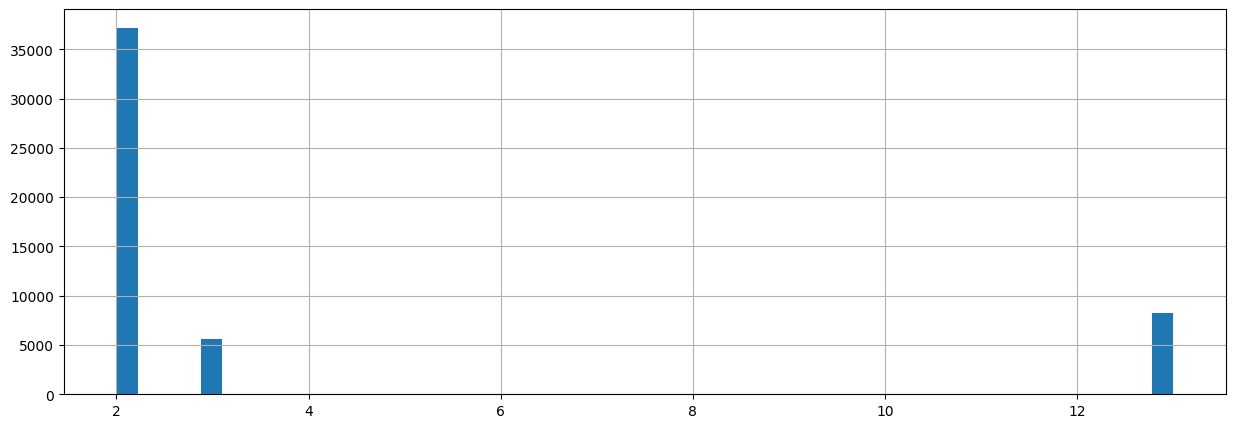

In [19]:
trainset.language.hist(bins = 50, figsize = (15, 5))
plt.show()

In [20]:
value_counts = trainset['language'].value_counts()
print(value_counts)

language
2     37202
13     8296
3      5646
Name: count, dtype: int64


### Validation Set

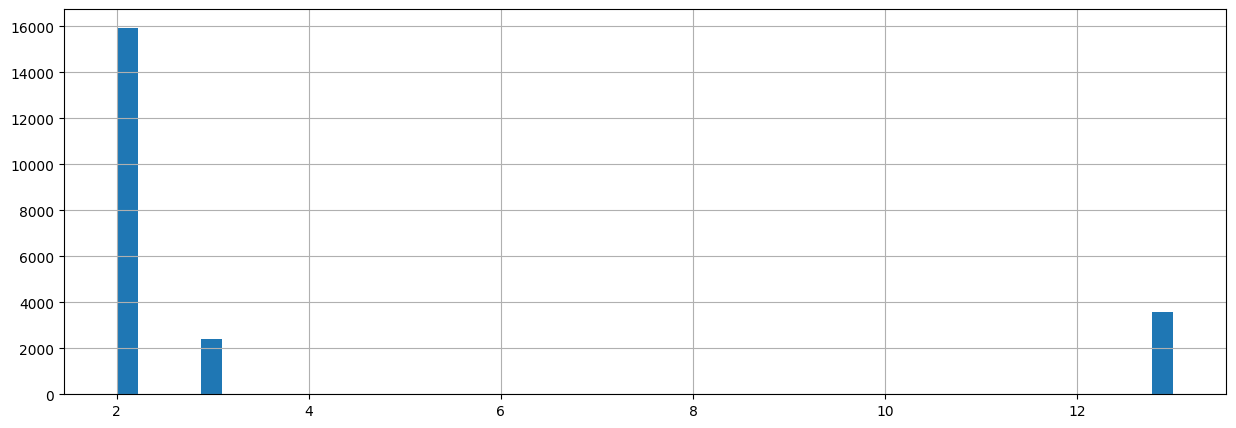

In [21]:
val_set.language.hist(bins = 50, figsize = (15, 5))
plt.show()

In [22]:
value_counts = val_set['language'].value_counts()
print(value_counts)

language
2     15944
13     3556
3      2420
Name: count, dtype: int64


### Testset

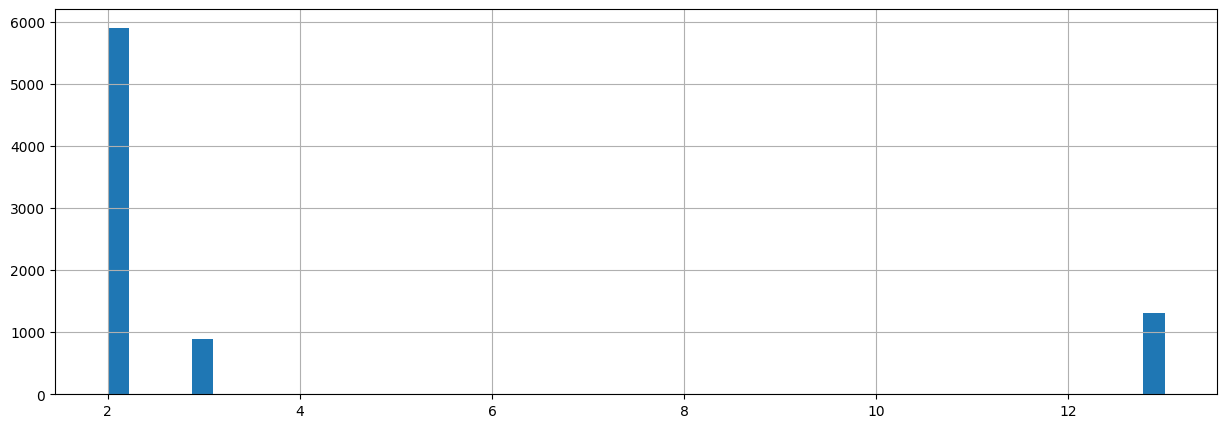

In [23]:
testset.language.hist(bins = 50, figsize = (15, 5))
plt.show()

In [24]:
value_counts = testset['language'].value_counts()
print(value_counts)

language
2     5906
13    1317
3      897
Name: count, dtype: int64


## Overview on label in each language

### Trainset

In [25]:
# filter out english, chinese and Indonesian
en_df = trainset[trainset.language ==2]
zh_df = trainset[trainset.language == 3]
id_df = trainset[trainset.language == 13]

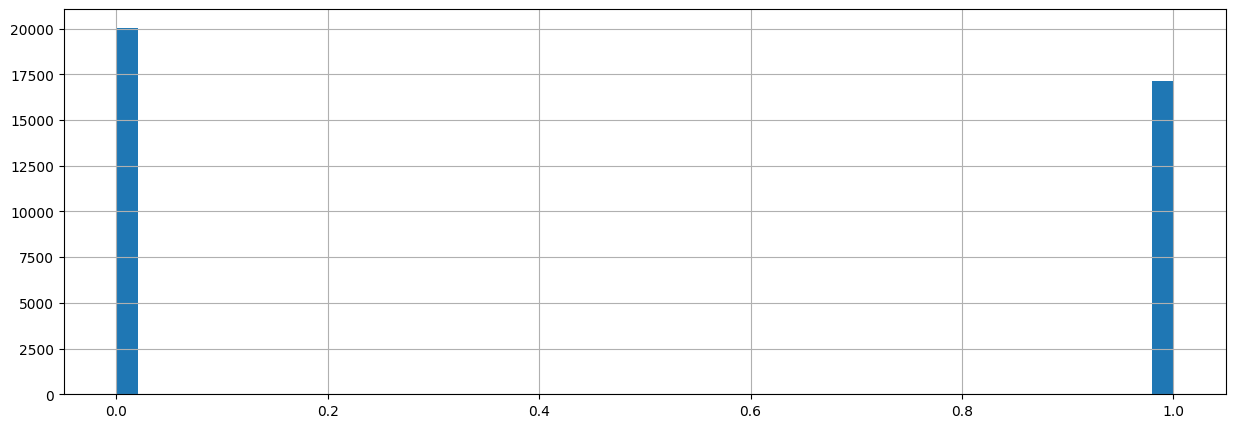

In [26]:
en_df.label.hist(bins = 50, figsize = (15, 5))
plt.show()

In [27]:
en_value_counts = en_df['label'].value_counts()
print(en_value_counts)

label
0.0    20054
1.0    17148
Name: count, dtype: int64


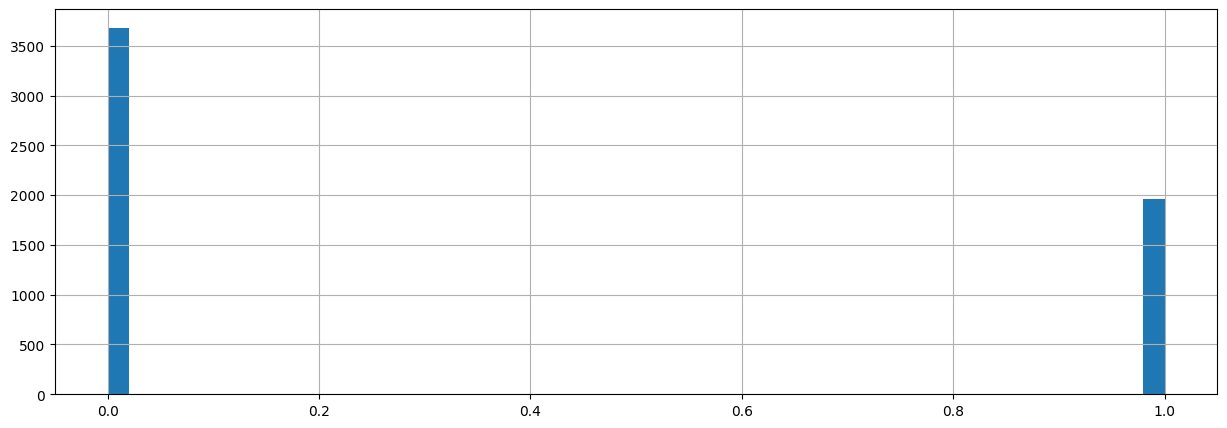

In [28]:
zh_df.label.hist(bins = 50, figsize = (15, 5))
plt.show()

In [29]:
zh_value_counts = zh_df['label'].value_counts()
print(zh_value_counts)

label
0.0    3683
1.0    1963
Name: count, dtype: int64


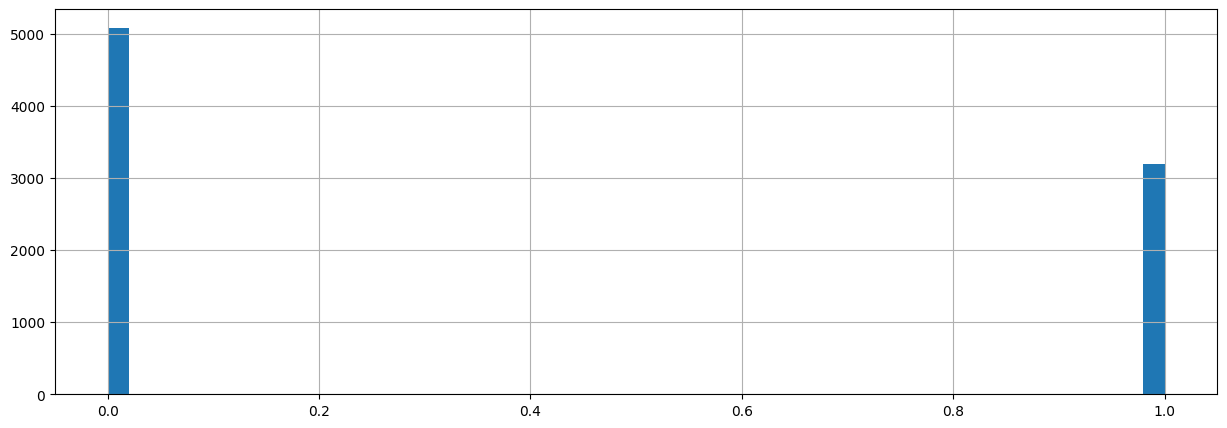

In [30]:
id_df.label.hist(bins = 50, figsize = (15, 5))
plt.show()

In [31]:
id_value_counts = id_df['label'].value_counts()
print(id_value_counts)

label
0.0    5092
1.0    3204
Name: count, dtype: int64


### Validation Set

In [32]:
# filter out english, chinese and Indonesian
en_df_val = val_set[val_set.language ==2]
zh_df_val = val_set[val_set.language == 3]
id_df_val = val_set[val_set.language == 13]

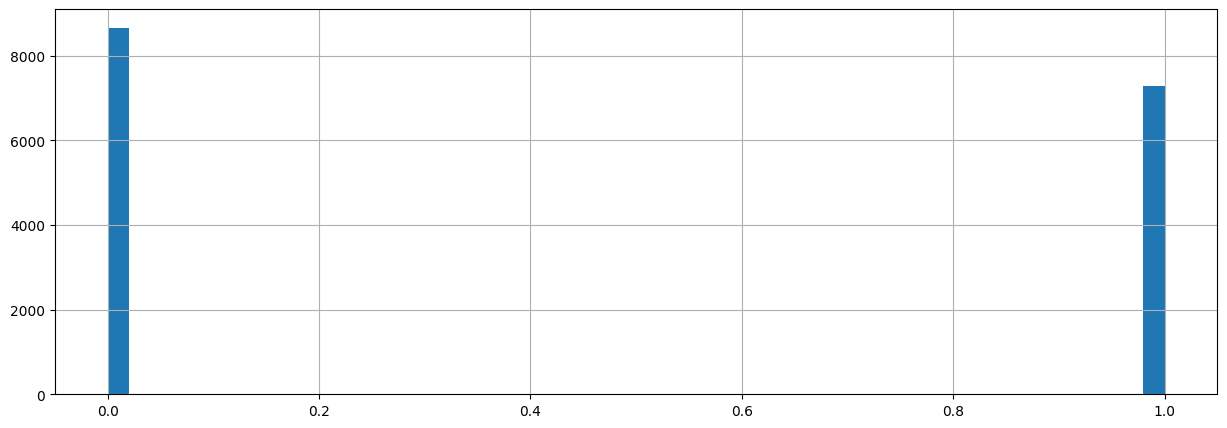

In [33]:
en_df_val.label.hist(bins = 50, figsize = (15, 5))
plt.show()

In [34]:
en_value_counts_val = en_df_val['label'].value_counts()
print(en_value_counts_val)

label
0.0    8666
1.0    7278
Name: count, dtype: int64


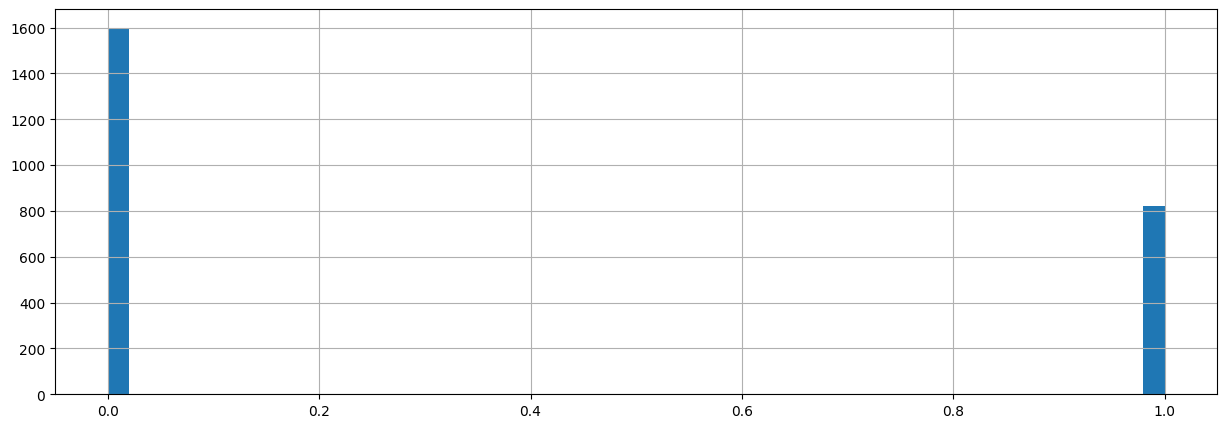

In [35]:
zh_df_val.label.hist(bins = 50, figsize = (15, 5))
plt.show()

In [36]:
zh_value_counts_val = zh_df_val['label'].value_counts()
print(zh_value_counts_val)

label
0.0    1600
1.0     820
Name: count, dtype: int64


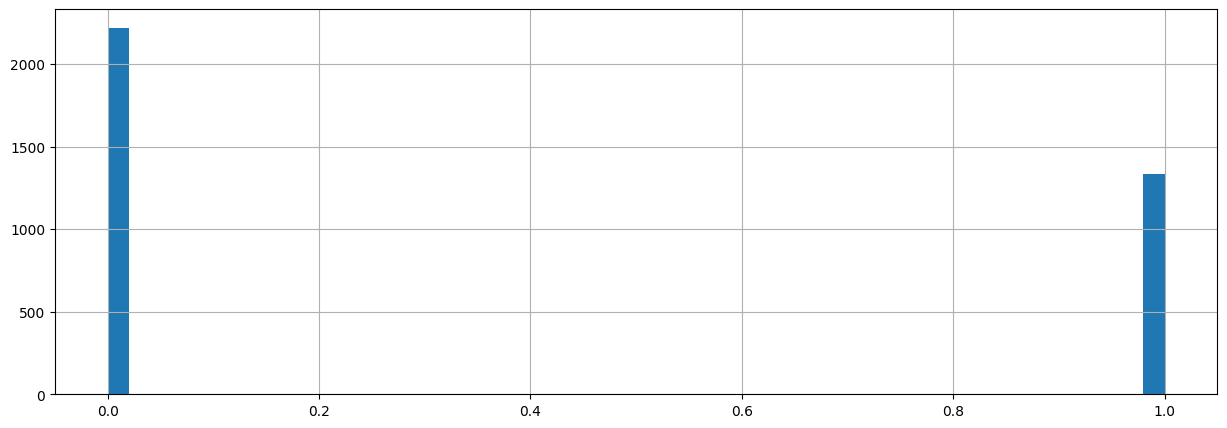

In [37]:
id_df_val.label.hist(bins = 50, figsize = (15, 5))
plt.show()

In [38]:
id_value_counts_val = id_df_val['label'].value_counts()
print(id_value_counts_val)

label
0.0    2221
1.0    1335
Name: count, dtype: int64


### Testset

In [39]:
# filter out english, chinese and Indonesian
en_df_test = testset[testset.language ==2]
zh_df_test = testset[testset.language == 3]
id_df_test = testset[testset.language == 13]

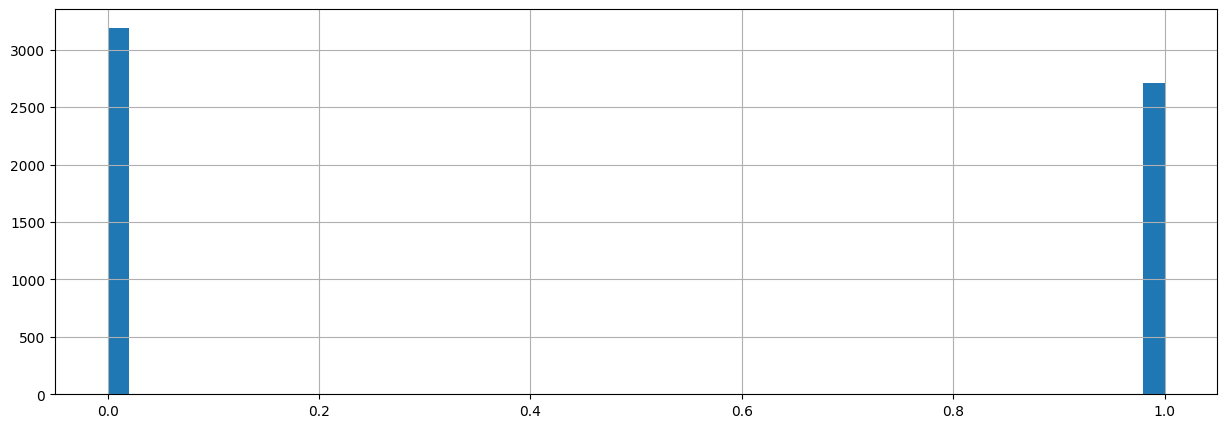

In [40]:
en_df_test.label.hist(bins = 50, figsize = (15, 5))
plt.show()

In [41]:
en_value_counts_test = en_df_test['label'].value_counts()
print(en_value_counts_test)

label
0.0    3192
1.0    2714
Name: count, dtype: int64


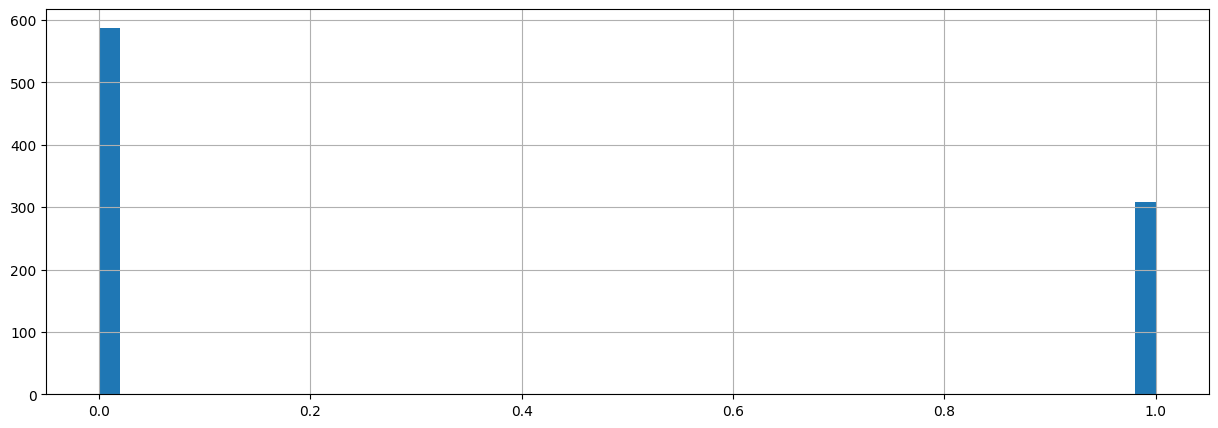

In [42]:
zh_df_test.label.hist(bins = 50, figsize = (15, 5))
plt.show()

In [43]:
zh_value_counts_test = zh_df_test['label'].value_counts()
print(zh_value_counts_test)

label
0.0    588
1.0    309
Name: count, dtype: int64


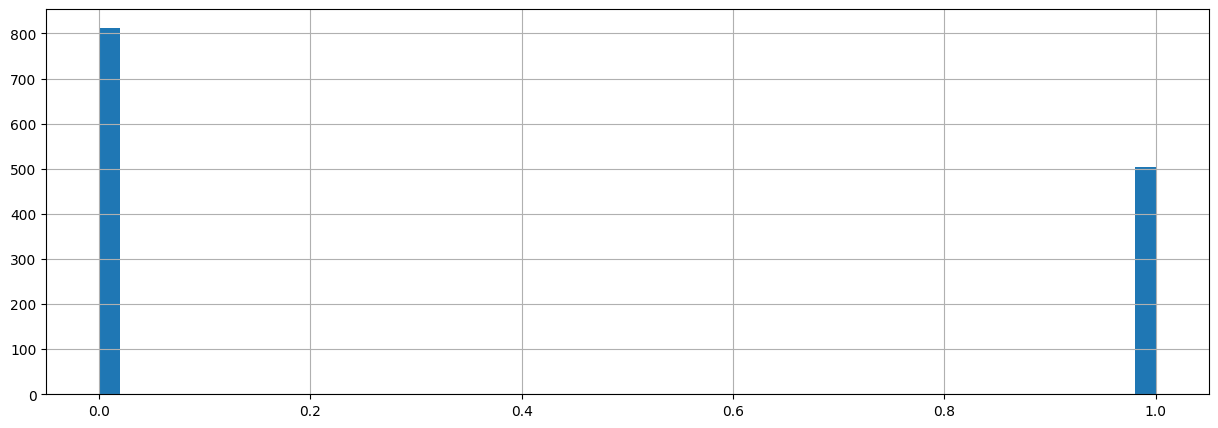

In [44]:
id_df_test.label.hist(bins = 50, figsize = (15, 5))
plt.show()

In [45]:
id_value_counts_test = id_df_test['label'].value_counts()
print(id_value_counts_test)

label
0.0    813
1.0    504
Name: count, dtype: int64


# Oversampling

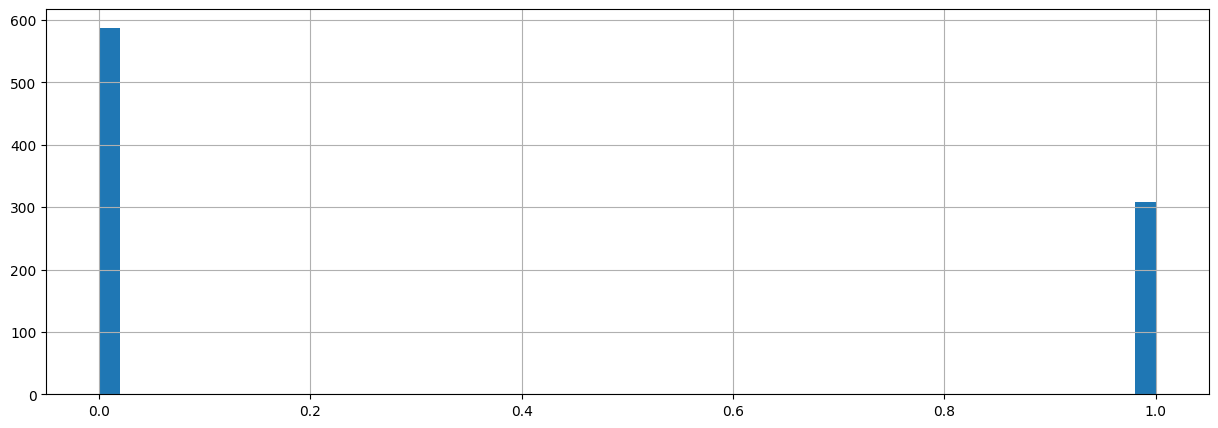

In [46]:
chinese = testset[testset['language'] == 3]
chinese.label.hist(bins = 50, figsize = (15, 5))
plt.show()

In [47]:
def oversample(dataframe, sampling_strategy='auto', random_state=42):
    # Error handling for required columns
    if 'text' not in dataframe.columns or 'label' not in dataframe.columns:
        raise ValueError("DataFrame must contain 'text' and 'label' columns.")

    # Initialize the oversampler
    oversampler = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=random_state)

    # Extract text and label columns and any other relevant columns
    feature_columns = [col for col in dataframe.columns if col != 'label']  # Assuming 'label' is the only target column
    X = dataframe[feature_columns]
    y = dataframe['label']

    # Perform random oversampling
    X_resampled, y_resampled = oversampler.fit_resample(X, y)

    # Create a new DataFrame for the oversampled data
    oversampled_df = pd.DataFrame(X_resampled, columns=feature_columns)
    oversampled_df['label'] = y_resampled

    return oversampled_df

In [48]:
def oversampling(dataframe):
    
    en_df = dataframe[dataframe.language == 2]
    zh_df = dataframe[dataframe.language == 3]
    id_df = dataframe[dataframe.language == 13]
    
    oversampled_zh = oversample(zh_df)
    oversampled_id = oversample(id_df)
    
    oversampled_df = pd.concat([en_df, oversampled_zh, oversampled_id], ignore_index=True)
    
    return oversampled_df

In [49]:
train_value = trainset['language'].value_counts()
print(train_value)

language
2     37202
13     8296
3      5646
Name: count, dtype: int64


In [50]:
oversampled_trainset = oversampling(trainset)

train_value = oversampled_trainset['language'].value_counts()
print(train_value)

language
2     37202
13    10184
3      7366
Name: count, dtype: int64


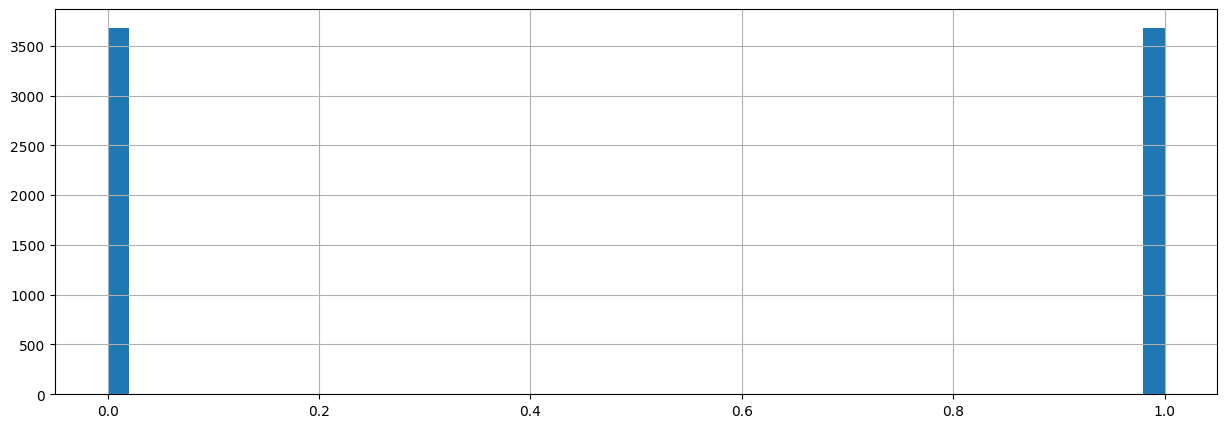

In [51]:
chinese = oversampled_trainset[oversampled_trainset['language'] == 3]
chinese.label.hist(bins = 50, figsize = (15, 5))
plt.show()

# Preprocessing

## Preprocessing English

In [52]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [53]:
# abbreviation list taken from https://www.kaggle.com/code/nmaguette/up-to-date-list-of-slangs-for-text-preprocessing#Slangs
# English Abbreviation
abbreviations = {
    "$": " dollar ",
    "€": " euro ",
    "4ao": "for adults only",
    "a.m": "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk",
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart",
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "pls" : "please",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet",
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously",
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [54]:
class EnTextCleaner:
    def __init__(self, dataframe, abbreviations):
        self.dataframe = dataframe.copy()
        self.abbreviations = abbreviations

    def lower_casing(self):
        """Convert all text to lowercase."""
        self.dataframe.loc[:, 'cleaned_text'] = self.dataframe["text"].str.lower()
        return self

    def remove_urls(self):
        """Remove urls."""
        url_re = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
        self.dataframe.loc[:, 'cleaned_text'] = self.dataframe["cleaned_text"].apply(lambda text: url_re.sub('', text))
        return self

    def remove_usernames(self):
        """Remove usernames that start with '@'."""
        self.dataframe.loc[:, 'cleaned_text'] = self.dataframe['cleaned_text'].apply(lambda text: re.sub('@[^\s]+', '', text))
        return self

    def remove_html(self):
        """Remove HTML tags."""
        tag_re = re.compile(r'<[^>]+>')
        self.dataframe.loc[:, 'cleaned_text'] = self.dataframe['cleaned_text'].apply(lambda text: tag_re.sub('', text))
        return self

    def remove_hex_and_unicode(self):  #found in indonesian
        """Remove hexadecimal and Unicode escape sequences."""
        self.dataframe.loc[:, 'cleaned_text'] = self.dataframe['cleaned_text'].apply(
            lambda text: re.sub(r'\\x[0-9a-fA-F]+|\\u[0-9a-fA-F]{4}', '', text))
        return self

    def remove_emoji(self):
        """Remove emoji from text"""
        self.dataframe.loc[:, 'cleaned_text'] = self.dataframe['cleaned_text'].apply(lambda text: emoji.replace_emoji(text))
        return self

    def remove_punctuation(self):
        """Remove punctuation from the text, including Chinese punctuation if specified."""
        en_punct_pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
        self.dataframe.loc[:, 'cleaned_text'] = self.dataframe['cleaned_text'].apply(lambda text: en_punct_pattern.sub('', text))
        return self

    def remove_numbers(self):
        """Remove numbers"""
        self.dataframe.loc[:, 'cleaned_text'] = self.dataframe['cleaned_text'].apply(lambda text: re.sub('\d+', '', text))
        return self

    def remove_whitespace(self):
        """Remove whitespaces"""
        self.dataframe.loc[:, 'cleaned_text'] = self.dataframe['cleaned_text'].apply(lambda text: " ".join(text.split()))
        return self

    def chat_word_conversion(self):
        """Convert chat words into formal words"""
        def convert_abbrev(text):
            #tokenize the text first
            tokens = word_tokenize(text)
            converted_tokens = [self.abbreviations.get(token.lower(), token) for token in tokens]
            return ' ' .join(converted_tokens)

        self.dataframe.loc[:, 'cleaned_text'] = self.dataframe['cleaned_text'].apply(convert_abbrev)
        return self

    def remove_en_stopwords(self):
        """Remove stopwords"""
        def remove_stopwords(text):
            tokens = word_tokenize(text)
            english_stopwords = set(stopwords.words('english')) | {"retweet", "user"}
            removed_tokens = [token for token in tokens if token not in english_stopwords]
            return ' ' .join(removed_tokens)

        self.dataframe.loc[:, 'cleaned_text'] = self.dataframe['cleaned_text'].apply(remove_stopwords)
        return self

    def en_lemmatizer(self):
        """Lemmatize English"""

        def lemmatize_words(text):
            """Function to lemmatize words in a list of tokens"""
            lemmatizer = WordNetLemmatizer()
            wordnet_map = {
                'N': wordnet.NOUN,
                'V': wordnet.VERB,
                'R': wordnet.ADV,
                'J': wordnet.ADJ
            }

            tokens = word_tokenize(text)

            # Perform part-of-speech tagging
            pos_tagged_tokens = nltk.pos_tag(tokens)
            # Lemmatize each word based on its part-of-speech
            lemmatized_tokens = [lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_tokens]
            return ' ' .join(lemmatized_tokens)

        self.dataframe.loc[:, 'cleaned_text'] = self.dataframe['cleaned_text'].apply(lemmatize_words)
        return self

    def get_cleaned_dataframe(self):
        """Return the cleaned DataFrame."""
        return self.dataframe

## Chinese Preprocessing

In [55]:
# take from online and combine chatgpt generated stopwords
# https://www.ranks.nl/stopwords/chinese-stopwords
zh_stopwords = ['的','一','不','在','人','有','是','为','以','于','上','他','而','后','之','来','及','了',
                '因','下','可','到','由','这','与','也','此','但','并','个','其','已','无','小','我','们',
                '起','最','再','今','去','好','只','又','或','很','亦','某','把','那','你','乃','它','吧',
                '被','比','别','趁','当','从','得','打','凡','儿','尔','该','各','给','跟','和','何','还',
                '即','几','既','看','据','距','靠','啦','另','么','每','嘛','拿','哪','您','凭','且','却',
                '让','仍','啥','如','若','使','谁','虽','随','同','所','她','哇','嗡','往','些','向','沿',
                '哟','用','咱','则','怎','曾','至','致','着','诸','自','呢','吗','啊','哦','呀','噢','哈',
                '呃','嗯','唉','啦','呗','嘿','哒','啵','喽','嘛','咧','咋','哩','呼','吱','呜','咦','咚',
                '哐','咔','哧','咕','呶','噻','哇','哔','嗖','嘎','嗒','嘘','嘁','呕','啪','啷','啪','喳',
                '嘤','轰','哼','唿','嚯','呵','嚓','哒','嗡','嘻','嘟','嗑','嗬','嗔','嗦','嗝','嗄','嗯', 
                '嗨','喽','嘿','呀','呦','矣','哉','俺','尔','耶','呗','咻','咿','哎','哏','哗','咯','啰', 
                '啧','喏','喔','嗷','嘈','嘤','嗉','呷','呱','呤','噼','啪','叽','咣','咭','哒','嗒','嗤',
                '哙','哚','哜','嗖','嗑','嗲','嘚','嗌','嘧','嘭','哓','嗵','都']

In [56]:
class ZhTextCleaner:
    def __init__(self, dataframe, zh_stopwords):
        self.dataframe = dataframe.copy()
        self.zh_stopwords = zh_stopwords

    def remove_urls(self):
        """Remove urls."""
        url_re = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
        self.dataframe.loc[:, 'cleaned_text'] = self.dataframe["text"].apply(lambda text: url_re.sub('', text))
        return self

    def remove_usernames(self):
        """Remove usernames that start with '@'."""
        self.dataframe.loc[:, 'cleaned_text'] = self.dataframe['cleaned_text'].apply(lambda text: re.sub('@[^\s]+', '', text))
        return self

    def remove_html(self):
        """Remove HTML tags."""
        tag_re = re.compile(r'<[^>]+>')
        self.dataframe.loc[:, 'cleaned_text'] = self.dataframe['cleaned_text'].apply(lambda text: tag_re.sub('', text))
        return self

    def remove_hex_and_unicode(self):  #found in indonesian
        """Remove hexadecimal and Unicode escape sequences."""
        self.dataframe.loc[:, 'cleaned_text'] = self.dataframe['cleaned_text'].apply(
            lambda text: re.sub(r'\\x[0-9a-fA-F]+|\\u[0-9a-fA-F]{4}', '', text))
        return self

    def remove_emoji(self):
        """Remove emoji from text"""
        self.dataframe.loc[:, 'cleaned_text'] = self.dataframe['cleaned_text'].apply(lambda text: emoji.replace_emoji(text))
        return self

    def remove_punctuation(self):
        """Remove punctuation from the text, including Chinese punctuation if specified."""
        zh_punct_pattern = re.compile('[' + re.escape(string.punctuation) + "\u3000-\u303F" +"\uFF00-\uFFEF" +"\u2000-\u206F" +"\u2E00-\u2E7F" + ']+')
        self.dataframe.loc[:, 'cleaned_text'] = self.dataframe['cleaned_text'].apply(lambda text: zh_punct_pattern.sub('', text))
        return self

    def remove_numbers(self):
        """Remove numbers"""
        self.dataframe.loc[:, 'cleaned_text'] = self.dataframe['cleaned_text'].apply(lambda text: re.sub('\d+', '', text))
        return self

    def remove_whitespace(self):
        """Remove whitespaces"""
        self.dataframe.loc[:, 'cleaned_text'] = self.dataframe['cleaned_text'].apply(lambda text: " ".join(text.split()))
        return self

    def remove_zh_stopwords(self):
        """Remove stopwords"""
        def remove_stopwords(text):
            tokens = jieba.lcut(text)
            removed_tokens = [token for token in tokens if token not in self.zh_stopwords]
            return ' ' .join(removed_tokens)

        self.dataframe.loc[:, 'cleaned_text'] = self.dataframe['cleaned_text'].apply(remove_stopwords)
        return self

    def get_cleaned_dataframe(self):
        """Return the cleaned DataFrame."""
        return self.dataframe

## Preprocessing Indosnesian

In [57]:
class IdTextCleaner:
    def __init__(self, dataframe, abbreviations):
        self.dataframe = dataframe.copy()
        self.abbreviations = abbreviations

    def lower_casing(self):
        """Convert all text to lowercase."""
        self.dataframe.loc[:, 'cleaned_text'] = self.dataframe["text"].str.lower()
        return self

    def remove_urls(self):
        """Remove urls."""
        url_re = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
        self.dataframe.loc[:, 'cleaned_text'] = self.dataframe["cleaned_text"].apply(lambda text: url_re.sub('', text))
        return self

    def remove_usernames(self):
        """Remove usernames that start with '@'."""
        self.dataframe.loc[:, 'cleaned_text'] = self.dataframe['cleaned_text'].apply(lambda text: re.sub('@[^\s]+', '', text))
        return self

    def remove_html(self):
        """Remove HTML tags."""
        tag_re = re.compile(r'<[^>]+>')
        self.dataframe.loc[:, 'cleaned_text'] = self.dataframe['cleaned_text'].apply(lambda text: tag_re.sub('', text))
        return self

    def remove_hex_and_unicode(self):  #found in indonesian
        """Remove hexadecimal and Unicode escape sequences."""
        self.dataframe.loc[:, 'cleaned_text'] = self.dataframe['cleaned_text'].apply(
            lambda text: re.sub(r'\\x[0-9a-fA-F]+|\\u[0-9a-fA-F]{4}|[\u2600-\u26FF]', '', text))
        return self

    def remove_emoji(self):
        """Remove emoji from text"""
        self.dataframe.loc[:, 'cleaned_text'] = self.dataframe['cleaned_text'].apply(lambda text: emoji.replace_emoji(text))
        return self

    def remove_punctuation(self):
        """Remove punctuation from the text, including Chinese punctuation if specified."""
        en_punct_pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
        self.dataframe.loc[:, 'cleaned_text'] = self.dataframe['cleaned_text'].apply(lambda text: en_punct_pattern.sub('', text))
        return self

    def remove_numbers(self):
        """Remove numbers"""
        self.dataframe.loc[:, 'cleaned_text'] = self.dataframe['cleaned_text'].apply(lambda text: re.sub('\d+', '', text))
        return self

    def remove_whitespace(self):
        """Remove whitespaces"""
        self.dataframe.loc[:, 'cleaned_text'] = self.dataframe['cleaned_text'].apply(lambda text: " ".join(text.split()))
        return self

    def chat_word_conversion(self):
        """Convert chat words into formal words"""
        def convert_abbrev(text):
            tokens = word_tokenize(text)
            converted_tokens = [self.abbreviations.get(token.lower(), token) for token in tokens]
            return ' ' .join(converted_tokens)

        self.dataframe.loc[:, 'cleaned_text'] = self.dataframe['cleaned_text'].apply(convert_abbrev)
        return self

    def replace_slang(self):
        """Convert slang into formal words"""
        def replace_indonesian_slang(text):
            text_with_slang_replaced = replace_slang(text)
            return text_with_slang_replaced

        self.dataframe.loc[:, 'cleaned_text'] = self.dataframe['cleaned_text'].apply(replace_indonesian_slang)
        return self

    def remove_id_stopwords(self):
        """Remove stopwords"""
        def remove_stopwords(text):
            tokens = word_tokenize(text)
            indonesian_stopwords = set(stopwords.words('indonesian')) | {"retweet", "user"}
            removed_tokens = [token for token in tokens if token not in indonesian_stopwords]
            return ' ' .join(removed_tokens)

        self.dataframe.loc[:, 'cleaned_text'] = self.dataframe['cleaned_text'].apply(remove_stopwords)
        return self

    def id_stemmer(self):
        """Stem indonesian text"""
        def stem_indonesian(text):
            tokens = word_tokenize(text)
            stemmer_id = stemmer("indonesian")
            stemmed_tokens = [stemmer_id.stemWord(token) for token in tokens]
            return ' ' .join(stemmed_tokens)

        self.dataframe.loc[:, 'cleaned_text'] = self.dataframe['cleaned_text'].apply(stem_indonesian)
        return self

    def get_cleaned_dataframe(self):
        """Return the cleaned DataFrame."""
        return self.dataframe

## Preprocessed Dataframe

In [58]:
def preprocessing(dataframe, abbreviations, zh_stopwords):

    # Split the dataframe base on its language
    en_df = dataframe[dataframe.language == 2]
    zh_df = dataframe[dataframe.language == 3]
    id_df = dataframe[dataframe.language == 13]

    #peform preprocessing for each language dataframe
    en_cleaner = EnTextCleaner(en_df, abbreviations)
    en_cleaner.lower_casing()
    en_cleaner.remove_urls()
    en_cleaner.remove_usernames()
    en_cleaner.remove_html()
    en_cleaner.remove_hex_and_unicode()
    en_cleaner.remove_emoji()
    en_cleaner.remove_punctuation()
    en_cleaner.remove_numbers()
    en_cleaner.remove_whitespace()
    en_cleaner.chat_word_conversion()
    en_cleaner.remove_en_stopwords()
    en_cleaner.en_lemmatizer()
    en_cleaned = en_cleaner.get_cleaned_dataframe()

    zh_cleaner = ZhTextCleaner(zh_df, zh_stopwords)
    zh_cleaner.remove_urls()
    zh_cleaner.remove_usernames()
    zh_cleaner.remove_html()
    zh_cleaner.remove_hex_and_unicode()
    zh_cleaner.remove_emoji()
    zh_cleaner.remove_punctuation()
    zh_cleaner.remove_numbers()
    zh_cleaner.remove_whitespace()
    zh_cleaner.remove_zh_stopwords()
    zh_cleaned = zh_cleaner.get_cleaned_dataframe()

    id_cleaner = IdTextCleaner(id_df, abbreviations)
    id_cleaner.lower_casing()
    id_cleaner.remove_urls()
    id_cleaner.remove_usernames()
    id_cleaner.remove_html()
    id_cleaner.remove_hex_and_unicode()
    id_cleaner.remove_emoji()
    id_cleaner.remove_punctuation()
    id_cleaner.remove_numbers()
    id_cleaner.remove_whitespace()
    id_cleaner.chat_word_conversion()
    id_cleaner.replace_slang()
    id_cleaner.remove_id_stopwords()
    id_cleaner.id_stemmer()
    id_cleaned = id_cleaner.get_cleaned_dataframe()

    # Combine the cleaned subsets
    preprocessed_df = pd.concat([en_cleaned, zh_cleaned, id_cleaned], ignore_index=True)

    return preprocessed_df

## Preprocessed Trainset

In [59]:
preprocessed_trainset = preprocessing(oversampled_trainset, abbreviations, zh_stopwords)
preprocessed_trainset

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.270 seconds.
Prefix dict has been built successfully.


,text,label,language,cleaned_text
0,@m__isis ...,0.0,2,
1,"'How ISIS Brainwashed Me', an American Young G...",0.0,2,isi brainwash american young girl speaks
2,Muslim Man Hugs ISIS Militant Armed Wearing Su...,0.0,2,muslim man hug isi militant arm wear suicide v...
3,Le grand absent de l'euro a aura t daesh,0.0,2,le grand absent de leuro aura daesh
4,RT @joej2020usa: Netanyahu: Paris Massacre Sho...,1.0,2,netanyahu paris massacre show radical islam kn...
...,...,...,...,...
54747,"Buka youtube beberapa hari ini, nongolnya vide...",1.0,13,buka youtube nongol video lucinta luna mulu si...
54748,HEH SINTING YA LU URL,1.0,13,heh sinting ya lu url
54749,USER USER Bani Cebong jangan girang dulu',1.0,13,bani cebong girang
54750,"USER Tu pisang bule Mn ko gak neko "" pkai prof...",1.0,13,pisang bule neko paka profil kontol mister mis...


In [60]:
selected_texts = preprocessed_trainset.loc[preprocessed_trainset['language'] == 2, 'text']
print(selected_texts.iloc[26])
print("")
selected_texts = preprocessed_trainset.loc[preprocessed_trainset['language'] == 2, 'cleaned_text']
print(selected_texts.iloc[26])

RT @AyishaBaloch: #IndiaISISandBangladesh This nexus of Modi, Hasina and ISIS is the ugliest one against humanity pic.twitter.com/d477eyP9ug

indiaisisandbangladesh nexus modi hasina isi ugly one humanity pictwittercomdeypug


In [61]:
selected_texts = preprocessed_trainset.loc[preprocessed_trainset['language'] == 3, 'text']
print(selected_texts.iloc[26])
print("")
selected_texts = preprocessed_trainset.loc[preprocessed_trainset['language'] == 3, 'cleaned_text']
print(selected_texts.iloc[26])

: 叠猫猫的，400万场需要队友，不限级别，首页进，谢谢～  对方一个人

叠 猫猫 万场 需要 队友 限 级别 首页 进 谢谢   对方 一个


In [62]:
selected_texts = preprocessed_trainset.loc[preprocessed_trainset['language'] == 13, 'text']
print(selected_texts.iloc[26])
print("")
selected_texts = preprocessed_trainset.loc[preprocessed_trainset['language'] == 13, 'cleaned_text']
print(selected_texts.iloc[26])

USER Untuk mengedukasi manusya2 udik seperti qm misalnya'

edukasi manusya udik


## Preprocessing Validation Set

In [63]:
preprocessed_valset = preprocessing(val_set, abbreviations, zh_stopwords)
preprocessed_valset

,text,label,language,cleaned_text
0,Massive explosion rocked Sadr city east #Baghd...,1.0,2,massive explosion rock sadr city east baghdad ...
1,@user @user @user well didnt pay 1000$ phone 1...,1.0,2,well didnt pay phone st world mongoloid
2,RT @_______Krista: Vous n'avez pas peur de Die...,0.0,2,vous navez pas peur de dieu mais vous avez peu...
3,RT @Nidalgazaui: Dozens of Shiite Hasd-Al-Shab...,1.0,2,dozen shiite hasdalshab leader kill diyala isi...
4,@user see ferocity flames twat. indentificatio...,0.0,2,see ferocity flame twat indentification inform...
...,...,...,...,...
21915,USER Gapapa sipit juga cantik aku mah \xf0\x9f...,0.0,13,gapapa sipit cantik mah
21916,Koalisi tapi pakai hati. Cuci tangan sambil be...,0.0,13,koalisi paka hati cuci tangan gandeng topeng r...
21917,USER ke jamban ?',0.0,13,jamban
21918,USER Ngga ada kucing yang kesurupan karena kuc...,1.0,13,kucing surup kucing setan


## Preprocessing Testset

In [64]:
preprocessed_testset = preprocessing(testset, abbreviations, zh_stopwords)
preprocessed_testset

,text,label,language,cleaned_text
0,RT @warreports: 8 Pakistanis of #IRGC 's Zeyna...,1.0,2,pakistani irgc zeynabiun brigade kill north sy...
1,gronk tide pod commercial retarded,1.0,2,gronk tide pod commercial retard
2,@sfrantzman @pmakela1 what they found in Syria...,0.0,2,find syria lot weapon wwii gun shop isi lot ir...
3,After Pakistani Taliban announcement of their ...,0.0,2,pakistani taliban announcement support isi lin...
4,Good luck getting our attention this week ISIS...,0.0,2,good luck get attention week isi pokemongo
...,...,...,...,...
8115,"Ajarkan Muslim, agama tak ngajarkan membunuh, ...",1.0,13,ajar muslim agama ngajar bunuh paham islam aga...
8116,"RT USER: Mainstream sdh jelas,bhw oposisi meng...",0.0,13,mainstream jelasbhw oposisi esan neger masalah...
8117,"Bismillah,; superiorPRINTING;; Harga; Ecer :LG...",0.0,13,bismil superiorprinting harga ecer lgnpoloskpr...
8118,Nama Lengkap : Iris Jung\n\nNama Asli : Jung A...,0.0,13,nama lengkap iris jungnnnama asli jung an rinn...


# Export

In [65]:
preprocessed_trainset.to_pickle('oversampled_preprocessed_trainset_mBERT.pkl')
preprocessed_valset.to_pickle('oversampled_preprocessed_valset_mBERT.pkl')
preprocessed_testset.to_pickle('oversampled_preprocessed_testset_mBERT.pkl')